In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
apt = pd.read_csv('korea_apt_price_index.csv', parse_dates=[0], index_col=[0])
apt

,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu
2003-11-01,55.408061,52.489325,49.742691,50.468904,53.718390,54.574461
2003-12-01,55.092318,52.091964,49.499484,49.659332,52.993462,53.762715
2004-01-01,54.959520,51.936493,49.319186,49.209024,52.817450,53.461801
2004-02-01,55.144495,52.246176,49.313365,49.690013,53.740453,54.450882
2004-03-01,55.364299,52.519256,49.546900,50.041699,54.093270,55.125285
...,...,...,...,...,...,...
2022-01-01,106.284037,104.382212,103.601928,105.832631,105.894610,105.650612
2022-02-01,106.262040,104.296694,103.532344,105.827788,105.849950,105.561195
2022-03-01,106.203239,104.223178,103.453587,105.860287,105.863569,105.546678
2022-04-01,106.198462,104.212940,103.440473,106.005444,106.007405,105.546974


In [184]:
# convert month start to end
apt.index = apt.index + pd.tseries.offsets.MonthEnd()
apt


,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu
2003-11-30,55.408061,52.489325,49.742691,50.468904,53.718390,54.574461
2003-12-31,55.092318,52.091964,49.499484,49.659332,52.993462,53.762715
2004-01-31,54.959520,51.936493,49.319186,49.209024,52.817450,53.461801
2004-02-29,55.144495,52.246176,49.313365,49.690013,53.740453,54.450882
2004-03-31,55.364299,52.519256,49.546900,50.041699,54.093270,55.125285
...,...,...,...,...,...,...
2022-01-31,106.284037,104.382212,103.601928,105.832631,105.894610,105.650612
2022-02-28,106.262040,104.296694,103.532344,105.827788,105.849950,105.561195
2022-03-31,106.203239,104.223178,103.453587,105.860287,105.863569,105.546678
2022-04-30,106.198462,104.212940,103.440473,106.005444,106.007405,105.546974


In [185]:
start = '2003-11-01'
end = '2022-05-31'

In [186]:
import yfinance as yf

sp500 = yf.download('^GSPC', start='2003-11-01', end='2022-5-31', parse_dates=['Date'], index_col='Date')
sp500 = sp500.Close.to_frame()
sp500.rename(columns={"Close": "sp500"}, inplace=True)
sp500 = sp500.sp500.resample('M').mean()
sp500


[*********************100%***********************]  1 of 1 completed


Date
2003-11-30    1049.898945
2003-12-31    1080.635920
2004-01-31    1132.517499
2004-02-29    1143.356323
2004-03-31    1123.978245
                 ...     
2022-01-31    4573.815454
2022-02-28    4435.980494
2022-03-31    4391.265264
2022-04-30    4391.295996
2022-05-31    4035.770508
Freq: M, Name: sp500, Length: 223, dtype: float64

In [187]:
apt["sp500"] = sp500
apt

,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu,sp500
2003-11-30,55.408061,52.489325,49.742691,50.468904,53.718390,54.574461,1049.898945
2003-12-31,55.092318,52.091964,49.499484,49.659332,52.993462,53.762715,1080.635920
2004-01-31,54.959520,51.936493,49.319186,49.209024,52.817450,53.461801,1132.517499
2004-02-29,55.144495,52.246176,49.313365,49.690013,53.740453,54.450882,1143.356323
2004-03-31,55.364299,52.519256,49.546900,50.041699,54.093270,55.125285,1123.978245
...,...,...,...,...,...,...,...
2022-01-31,106.284037,104.382212,103.601928,105.832631,105.894610,105.650612,4573.815454
2022-02-28,106.262040,104.296694,103.532344,105.827788,105.849950,105.561195,4435.980494
2022-03-31,106.203239,104.223178,103.453587,105.860287,105.863569,105.546678,4391.265264
2022-04-30,106.198462,104.212940,103.440473,106.005444,106.007405,105.546974,4391.295996


In [188]:
# Normalize to the base values
apt = apt.div(apt.iloc[0])
apt

,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu,sp500
2003-11-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2003-12-31,0.994302,0.992430,0.995111,0.983959,0.986505,0.985126,1.029276
2004-01-31,0.991905,0.989468,0.991486,0.975036,0.983228,0.979612,1.078692
2004-02-29,0.995243,0.995368,0.991369,0.984567,1.000411,0.997736,1.089016
2004-03-31,0.999210,1.000570,0.996064,0.991535,1.006979,1.010093,1.070559
...,...,...,...,...,...,...,...
2022-01-31,1.918205,1.988637,2.082757,2.096987,1.971292,1.935898,4.356434
2022-02-28,1.917808,1.987008,2.081358,2.096891,1.970460,1.934260,4.225150
2022-03-31,1.916747,1.985607,2.079775,2.097535,1.970714,1.933994,4.182560
2022-04-30,1.916661,1.985412,2.079511,2.100411,1.973391,1.933999,4.182589


In [189]:
plt.style.use('seaborn')

<AxesSubplot:>

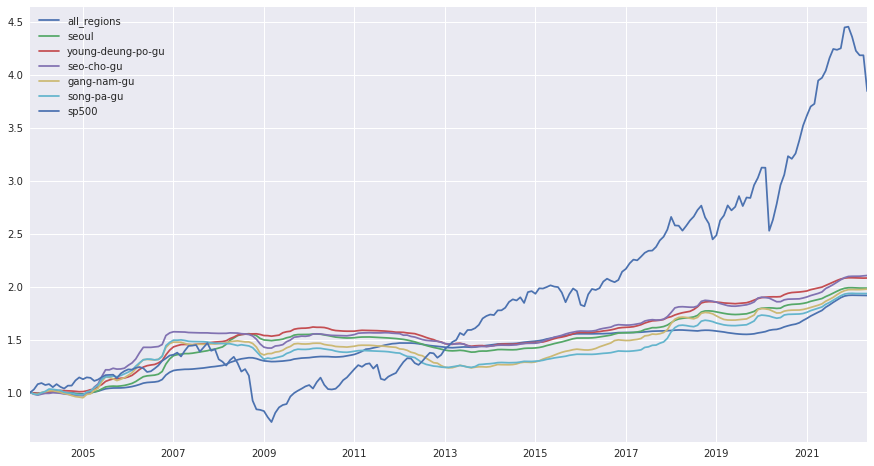

In [190]:
apt.plot(figsize=(15,8))

<AxesSubplot:>

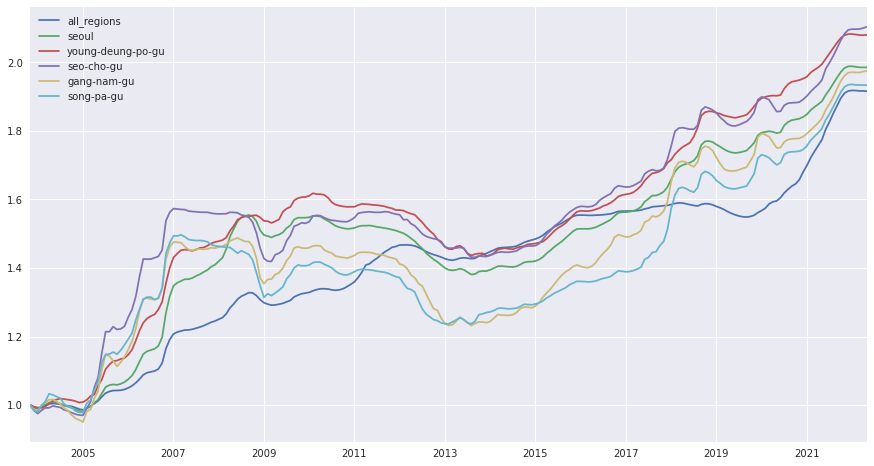

In [191]:
apt.drop(columns='sp500').plot(figsize=(15, 8))

<AxesSubplot:>

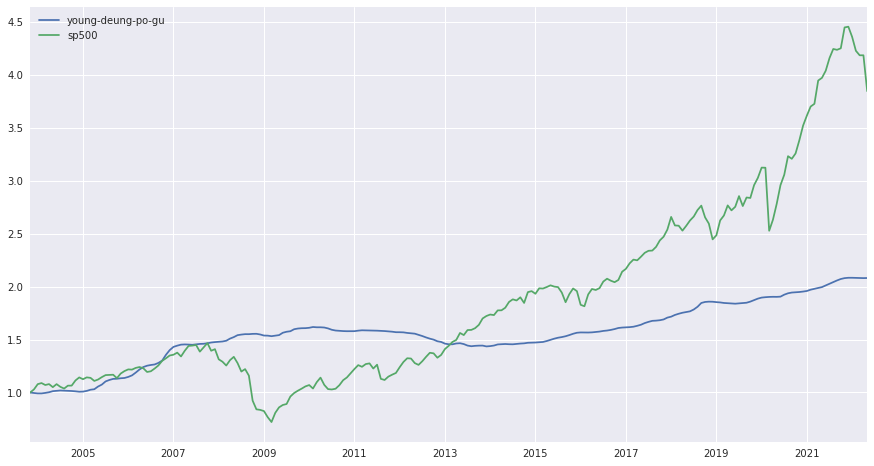

In [192]:
apt[["young-deung-po-gu", "sp500"]].plot(figsize=(15, 8))

<AxesSubplot:>

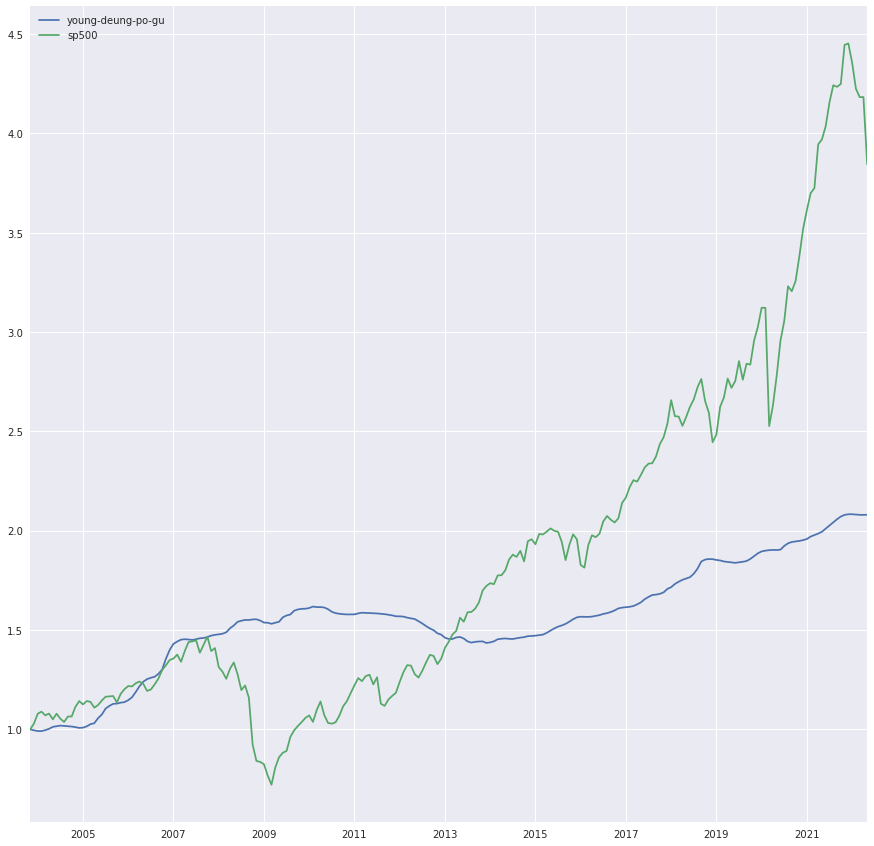

In [193]:
apt[["young-deung-po-gu", "sp500"]].plot(figsize=(15, 15))

In [194]:
usdkrw = yf.download('USDKRW=X', start=start, end=end, parse_dates=["Date"], index_col="Date").Close.to_frame()
usdkrw = usdkrw.resample('M').mean()
usdkrw

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2003-12-31,1188.434788
2004-01-31,1177.431818
2004-02-29,1161.725006
2004-03-31,1170.278267
2004-04-30,1156.113631
...,...
2022-01-31,1194.691912
2022-02-28,1197.942493
2022-03-31,1219.635222


In [195]:
apt["fx"] = usdkrw
apt

,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu,sp500,fx
2003-11-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2003-12-31,0.994302,0.992430,0.995111,0.983959,0.986505,0.985126,1.029276,1188.434788
2004-01-31,0.991905,0.989468,0.991486,0.975036,0.983228,0.979612,1.078692,1177.431818
2004-02-29,0.995243,0.995368,0.991369,0.984567,1.000411,0.997736,1.089016,1161.725006
2004-03-31,0.999210,1.000570,0.996064,0.991535,1.006979,1.010093,1.070559,1170.278267
...,...,...,...,...,...,...,...,...
2022-01-31,1.918205,1.988637,2.082757,2.096987,1.971292,1.935898,4.356434,1194.691912
2022-02-28,1.917808,1.987008,2.081358,2.096891,1.970460,1.934260,4.225150,1197.942493
2022-03-31,1.916747,1.985607,2.079775,2.097535,1.970714,1.933994,4.182560,1219.635222
2022-04-30,1.916661,1.985412,2.079511,2.100411,1.973391,1.933999,4.182589,1234.408093


In [196]:
apt.fillna(method="backfill", inplace=True)
apt = apt.div(apt.iloc[0])
apt

,all_regions,seoul,young-deung-po-gu,seo-cho-gu,gang-nam-gu,song-pa-gu,sp500,fx
2003-11-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2003-12-31,0.994302,0.992430,0.995111,0.983959,0.986505,0.985126,1.029276,1.000000
2004-01-31,0.991905,0.989468,0.991486,0.975036,0.983228,0.979612,1.078692,0.990742
2004-02-29,0.995243,0.995368,0.991369,0.984567,1.000411,0.997736,1.089016,0.977525
2004-03-31,0.999210,1.000570,0.996064,0.991535,1.006979,1.010093,1.070559,0.984722
...,...,...,...,...,...,...,...,...
2022-01-31,1.918205,1.988637,2.082757,2.096987,1.971292,1.935898,4.356434,1.005265
2022-02-28,1.917808,1.987008,2.081358,2.096891,1.970460,1.934260,4.225150,1.008000
2022-03-31,1.916747,1.985607,2.079775,2.097535,1.970714,1.933994,4.182560,1.026253
2022-04-30,1.916661,1.985412,2.079511,2.100411,1.973391,1.933999,4.182589,1.038684


In [197]:
adjusted = apt.copy()[["young-deung-po-gu", "sp500", "fx"]]
adjusted.rename(columns={"young-deung-po-gu": "apt_adj"}, inplace=True)
adjusted["apt_adj"] = adjusted.apt_adj.div(adjusted.fx)
adjusted

,apt_adj,sp500,fx
2003-11-30,1.000000,1.000000,1.000000
2003-12-31,0.995111,1.029276,1.000000
2004-01-31,1.000751,1.078692,0.990742
2004-02-29,1.014162,1.089016,0.977525
2004-03-31,1.011518,1.070559,0.984722
...,...,...,...
2022-01-31,2.071849,4.356434,1.005265
2022-02-28,2.064839,4.225150,1.008000
2022-03-31,2.026570,4.182560,1.026253
2022-04-30,2.002063,4.182589,1.038684


KRW-USD shows inverse relationship but since the global financial crisis (2009), fx rate seems to maintain within a range. Kor government is likely intervening actively.

<AxesSubplot:>

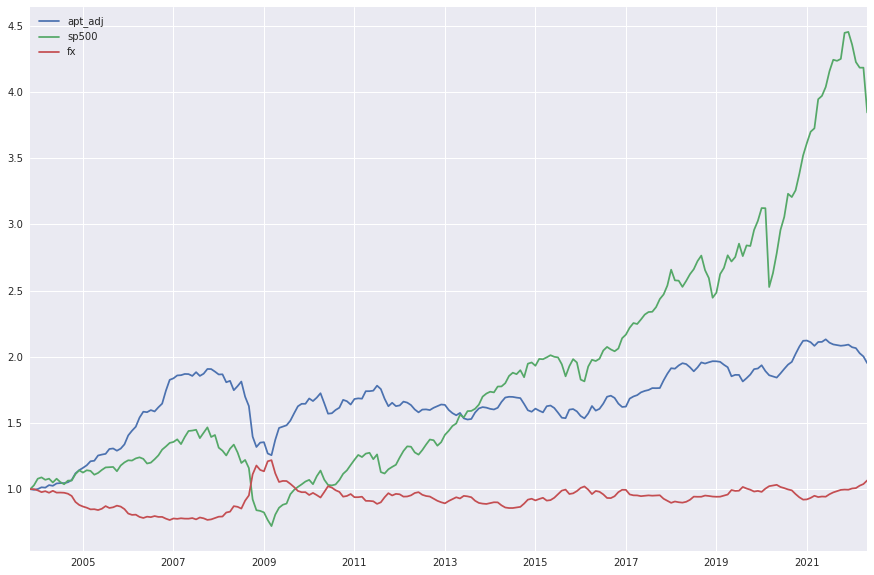

In [198]:
adjusted.plot(figsize=(15, 10))

In [199]:
adjusted

,apt_adj,sp500,fx
2003-11-30,1.000000,1.000000,1.000000
2003-12-31,0.995111,1.029276,1.000000
2004-01-31,1.000751,1.078692,0.990742
2004-02-29,1.014162,1.089016,0.977525
2004-03-31,1.011518,1.070559,0.984722
...,...,...,...
2022-01-31,2.071849,4.356434,1.005265
2022-02-28,2.064839,4.225150,1.008000
2022-03-31,2.026570,4.182560,1.026253
2022-04-30,2.002063,4.182589,1.038684
